In [1]:
%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import h5py

print(tf.__version__)

TensorFlow 2.x selected.
2.1.0-rc1


## The Street View House Numbers (SVHN) Dataset

SVHN is a real-world image dataset for developing machine learning and object

recognition algorithms with minimal requirement on data formatting but comes from a

significantly harder, unsolved, real world problem (recognizing digits and numbers in

natural scene images). SVHN is obtained from house numbers in Google Street View

images.

Link to the dataset:

https://drive.google.com/file/d/1L2-WXzguhUsCArrFUc8EEkXcj33pahoS/view?usp=sharing

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# Open the file as readonly
h5f = h5py.File('/content/drive/My Drive/SVHN_single_grey1.h5', 'r')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

In [4]:
# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]

# Close this file
h5f.close()

print('Training set', X_train.shape, y_train.shape)
print('Validation set', X_val.shape, y_val.shape)
print('Test set', X_test.shape, y_test.shape)

Training set (42000, 32, 32) (42000,)
Validation set (60000, 32, 32) (60000,)
Test set (18000, 32, 32) (18000,)


In [5]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [0]:
y_train_encoded=tf.keras.utils.to_categorical(y_train)
y_test_encoded=tf.keras.utils.to_categorical(y_test)
y_val_encoded=tf.keras.utils.to_categorical(y_val)

In [0]:
# convert from integers to floats
X_train_norm = X_train.astype('float32')
X_test_norm = X_test.astype('float32')
X_val_norm = X_val.astype('float32')
# normalize to range 0-1
X_train_norm = X_train_norm / 255.0
X_test_norm = X_test_norm / 255.0
X_val_norm = X_val_norm / 255.0
# return normalized images
from tensorflow.keras.backend import expand_dims
X_train_reshaped = X_train_norm.reshape((X_train_norm.shape[0], 32, 32, 1))
X_test_reshaped = X_test_norm.reshape((X_test_norm.shape[0], 32, 32, 1))
X_val_reshaped = X_val_norm.reshape((X_val_norm.shape[0], 32, 32, 1))
#X_train_reshaped = X_train_norm
#X_test_reshaped = X_test_norm

In [0]:
#Clear out tensorflow memory
tf.keras.backend.clear_session()

#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
#model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dropout(0.4))

#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dropout(0.3))

#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(60))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dropout(0.2))

#Add 4th hidden layer
model.add(tf.keras.layers.Dense(30))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dropout(0.1))

#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
#Compile the model using SGD

sgd = tf.keras.optimizers.SGD(lr=0.03, momentum=0.9, nesterov=True)   


model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dense (Dense)                (None, 200)               205000    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 200)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 200)               800       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 100)               0

In [54]:
mckpt = tf.keras.callbacks.ModelCheckpoint('./mnist_v1.h5', 
                                           monitor='val_acc', save_best_only=True)
model.fit(X_train,y_train_encoded,          
          validation_data=(X_val,y_val_encoded),
          epochs=5,
          batch_size=32, callbacks=[mckpt])
score = model.evaluate(X_test, y_test_encoded, batch_size=32)

Train on 42000 samples, validate on 60000 samples
Epoch 1/5
42000/42000 [==============================] - 26s 623us/sample - loss: 2.3065 - accuracy: 0.1000


InvalidArgumentError: ignored

In [0]:
#Clear out tensorflow memory
tf.keras.backend.clear_session()

#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add 1st hidden layer
model.add(tf.keras.layers.Dense(800))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dropout(0.4))

#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(400))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dropout(0.3))

#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dropout(0.2))

#Add 4th hidden layer
model.add(tf.keras.layers.Dense(30))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dropout(0.1))

#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
#Compile the model using SGD

sgd = tf.keras.optimizers.SGD(lr=0.03, momentum=0.9, nesterov=True)   


model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
mckpt = tf.keras.callbacks.ModelCheckpoint('./mnist_v1.h5', 
                                           monitor='val_acc', save_best_only=True)
history=model.fit(X_train,y_train_encoded,          
          validation_data=(X_val,y_val_encoded),
          epochs=50,
          batch_size=32, callbacks=[mckpt])
#score = model.evaluate(X_test, y_test_encoded, batch_size=32)

Train on 42000 samples, validate on 60000 samples
Epoch 1/50
42000/42000 [==============================] - 35s 828us/sample - loss: 1.4939 - accuracy: 0.4953 - val_loss: 1.0395 - val_accuracy: 0.6655
Epoch 2/50
42000/42000 [==============================] - 34s 802us/sample - loss: 1.0707 - accuracy: 0.6601 - val_loss: 0.7557 - val_accuracy: 0.7627
Epoch 3/50
42000/42000 [==============================] - 33s 793us/sample - loss: 0.9155 - accuracy: 0.7097 - val_loss: 0.6910 - val_accuracy: 0.7867
Epoch 4/50
42000/42000 [==============================] - 33s 786us/sample - loss: 0.8329 - accuracy: 0.7383 - val_loss: 0.5991 - val_accuracy: 0.8153
Epoch 5/50
42000/42000 [==============================] - 33s 794us/sample - loss: 0.7672 - accuracy: 0.7575 - val_loss: 0.5857 - val_accuracy: 0.8182
Epoch 6/50
42000/42000 [==============================] - 32s 767us/sample - loss: 0.7210 - accuracy: 0.7737 - val_loss: 0.5601 - val_accuracy: 0.8263
Epoch 7/50
42000/42000 [====================

In [0]:
#evaluating train and test
train_acc = model.evaluate(X_train, y_train_encoded, verbose=0)
test_acc = model.evaluate(X_test, y_test_encoded, verbose=0)

In [20]:
print(train_acc)

[0.10647627680464869, 0.97045237]


In [21]:
print('Train: %.3f, Test: %.3f' % (train_acc[1], test_acc[1]))

Train: 0.970, Test: 0.865


## Plot loss during training

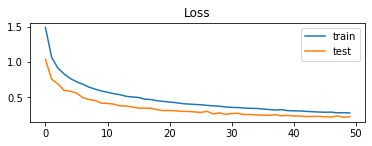

In [22]:
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# Plot accuracy during training

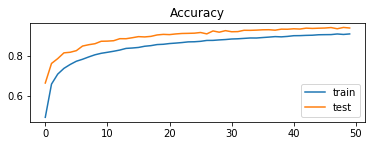

In [24]:
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

# Inference: 
In this case, we can see that the model learned the problem reasonably well, achieving about 97% accuracy on the training dataset and about 86% on the test dataset. The scores are reasonably close, suggesting the model is probably not over or underfit.

A figure is also created showing two line plots, the top with the cross-entropy loss over epochs for the train (blue) and test (orange) dataset, and the bottom plot showing classification accuracy over epochs.

The plot shows that the training process converged well. The plot for loss is smooth, given the continuous nature of the error between the probability distributions, whereas the line plot for accuracy shows bumps, given examples in the train and test set can ultimately only be predicted as correct or incorrect, providing less granular feedback on performance.

In [0]:
predictions = model.predict(X_train)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(9), class_names, rotation=90)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='blue')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

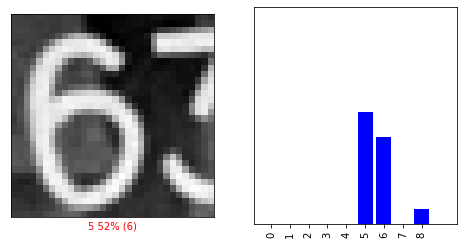

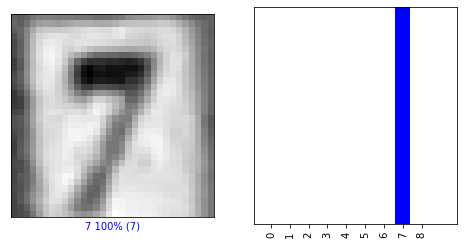

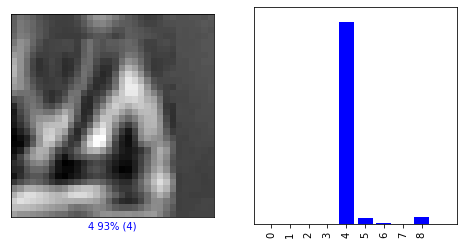

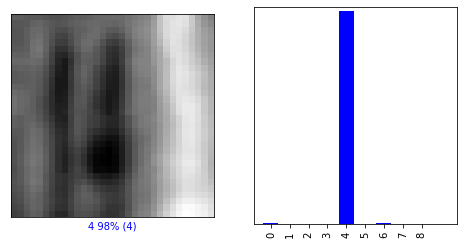

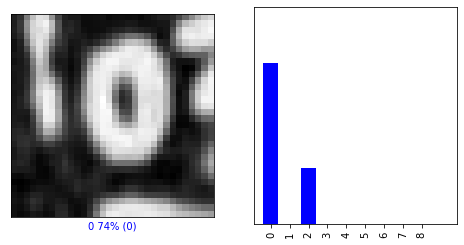

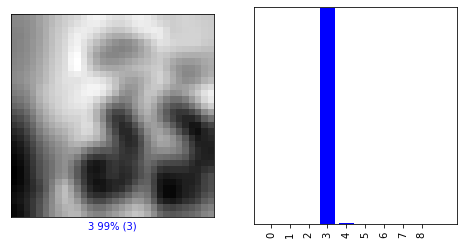

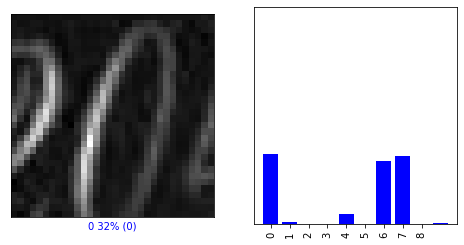

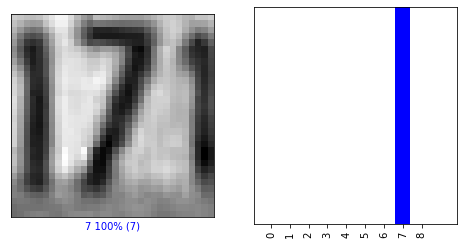

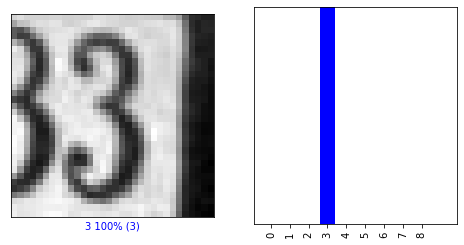

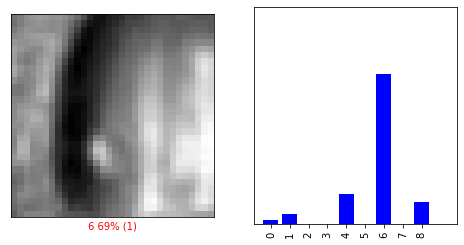

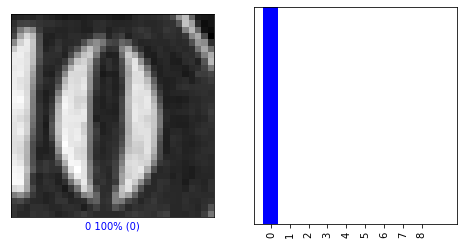

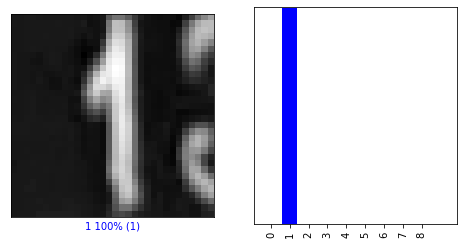

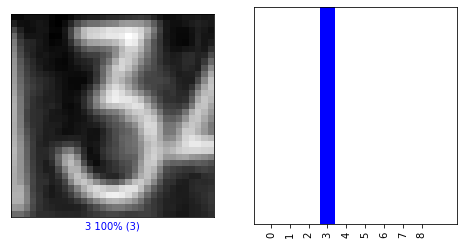

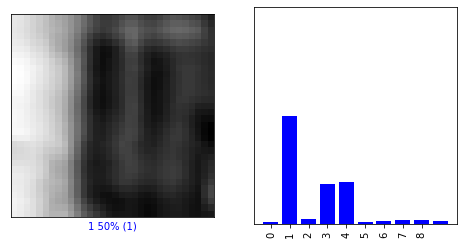

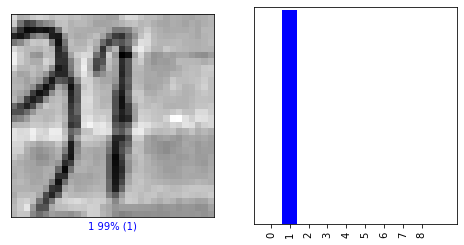

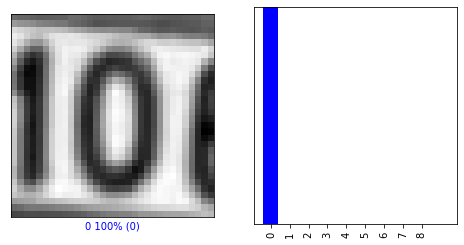

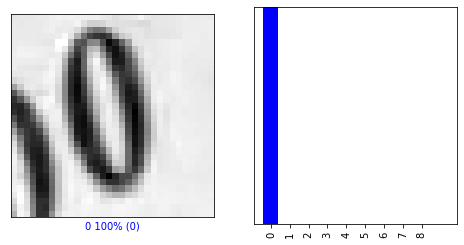

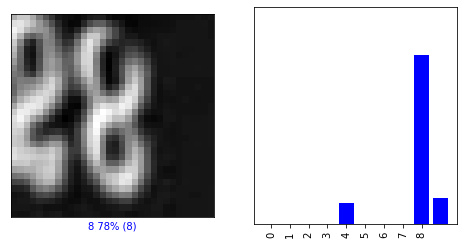

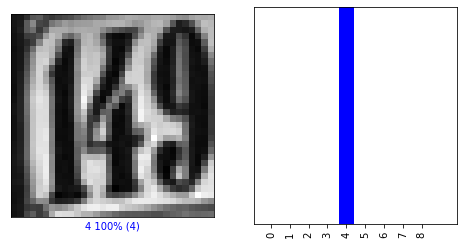

In [26]:
#Replace value of i with other index to check other product
for i in range(1,20):
  plt.figure(figsize=(8,4))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], y_train, X_train)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  y_train)
  plt.show()

# Inference:
Most predictions are successfully  classified as per the required numeric digit. As nos of epocs increases better it predicts